In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data_facebook=pd.read_excel('/content/sample_data/Sample Data.xlsx',sheet_name='Facebook Raw')
data_google=pd.read_excel('/content/sample_data/Sample Data.xlsx',sheet_name='Google Raw')

**Task 1**
**Data Cleaning & Preparation**

* The top five rows in facebook data

In [ ]:
data_facebook.head()

,Date,Campaign Name,Ad Set Name,Impressions,Clicks (Traffic),CTR,Cost (INR),CPC (INR),Leads,CPL (INR),Traffic to Lead,Call (Conversion),Lead To Call,Type of Call (Online),Type of Call (Offline)
0,2024-04-01,Retargeting,Ad Set 5,14762,804,0.054464,1960.95,2.438993,53,36.999057,0.065920,23,0.433962,12,11
1,2024-04-02,Retargeting,Ad Set 5,17231,867,0.050316,1623.68,1.872757,53,30.635472,0.061130,16,0.301887,13,3
2,2024-04-03,Retargeting,Ad Set 5,15996,823,0.051450,1844.80,2.241555,51,36.172549,0.061968,20,0.392157,11,9
3,2024-04-04,Retargeting,Ad Set 5,17387,858,0.049347,1891.43,2.204464,48,39.404792,0.055944,19,0.395833,13,6
4,2024-04-05,Retargeting,Ad Set 5,17006,786,0.046219,1563.34,1.988982,51,30.653725,0.064885,18,0.352941,16,2


* The top five rows in google data

In [ ]:
data_google.head()

,Date,Campaign Name,Ad Set Name,Cost (INR),Impressions,Clicks (Traffic),CTR,CPC (INR),Leads,CPL (INR),Traffic to Lead,Call,Lead to Call,Type of Call (Online),Type of Call (Offline),CAC
0,2024-04-01,Campaign A,Ad Set 1,2330.33,18714,1061,0.056696,2.196352,51,45.692745,0.048068,27,0.529412,17,10,86.308519
1,2024-04-02,Campaign A,Ad Set 1,2095.18,19795,1156,0.058399,1.812439,51,41.081961,0.044118,27,0.529412,13,14,77.599259
2,2024-04-03,Campaign A,Ad Set 1,2333.82,18258,1082,0.059262,2.156950,57,40.944211,0.052680,27,0.473684,15,12,86.437778
3,2024-04-04,Campaign A,Ad Set 1,2487.05,22554,1002,0.044427,2.482086,60,41.450833,0.059880,35,0.583333,10,25,71.058571
4,2024-04-05,Campaign A,Ad Set 1,1841.06,19872,1078,0.054247,1.707848,54,34.093704,0.050093,37,0.685185,10,27,49.758378


* Compare both data columns are same or not

In [ ]:
FB_col=set(data_facebook.columns)
Gol_col=set(data_google.columns)
res=FB_col-Gol_col
res1=Gol_col-FB_col
print(res)
print(res1)

{'Call (Conversion)', 'Lead To Call'}
{'Lead to Call', 'Call ', 'CAC'}


* Therefore  some column names are different while compare the datsets and Customer Acquisition Cost not present in facebook dataset

* Rename the column name in Facebook data

In [ ]:
data_facebook.rename(columns={'Call (Conversion)':'Call','Lead To Call':'Lead to Call'},inplace=True)

In [ ]:
FB_col=set(data_facebook.columns)
Gol_col=set(data_google.columns)
res=FB_col-Gol_col
res1=Gol_col-FB_col
print(res)
print(res1)

{'Call'}
{'Call ', 'CAC'}


In [ ]:
data_google.rename(columns={'Call ':'Call'},inplace=True)

In [ ]:
FB_col=set(data_facebook.columns)
Gol_col=set(data_google.columns)
res=FB_col-Gol_col
res1=Gol_col-FB_col
print(res)
print(res1)

set()
{'CAC'}


* ADD CAC column to facebook dataset

In [ ]:
data_facebook['CAC'] = data_facebook['Cost (INR)'] / data_facebook['Leads']
data_facebook.head()

,Date,Campaign Name,Ad Set Name,Impressions,Clicks (Traffic),CTR,Cost (INR),CPC (INR),Leads,CPL (INR),Traffic to Lead,Call,Lead to Call,Type of Call (Online),Type of Call (Offline),CAC
0,2024-04-01,Retargeting,Ad Set 5,14762,804,0.054464,1960.95,2.438993,53,36.999057,0.065920,23,0.433962,12,11,36.999057
1,2024-04-02,Retargeting,Ad Set 5,17231,867,0.050316,1623.68,1.872757,53,30.635472,0.061130,16,0.301887,13,3,30.635472
2,2024-04-03,Retargeting,Ad Set 5,15996,823,0.051450,1844.80,2.241555,51,36.172549,0.061968,20,0.392157,11,9,36.172549
3,2024-04-04,Retargeting,Ad Set 5,17387,858,0.049347,1891.43,2.204464,48,39.404792,0.055944,19,0.395833,13,6,39.404792
4,2024-04-05,Retargeting,Ad Set 5,17006,786,0.046219,1563.34,1.988982,51,30.653725,0.064885,18,0.352941,16,2,30.653725


In [ ]:
FB_col=set(data_facebook.columns)
Gol_col=set(data_google.columns)
res=FB_col-Gol_col
res1=Gol_col-FB_col
print(res)
print(res1)

set()
set()


* Check the dataformat is correct or not

In [ ]:
data_facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    270 non-null    datetime64[ns]
 1   Campaign Name           270 non-null    object        
 2   Ad Set Name             270 non-null    object        
 3   Impressions             270 non-null    int64         
 4   Clicks (Traffic)        270 non-null    int64         
 5   CTR                     270 non-null    float64       
 6   Cost (INR)              270 non-null    float64       
 7   CPC (INR)               270 non-null    float64       
 8   Leads                   270 non-null    int64         
 9   CPL (INR)               270 non-null    float64       
 10  Traffic to Lead         270 non-null    float64       
 11  Call                    270 non-null    int64         
 12  Lead to Call            270 non-null    float64   

In [ ]:
data_google.info()
data_facebook.info()
data_google['CTR'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    180 non-null    datetime64[ns]
 1   Campaign Name           180 non-null    object        
 2   Ad Set Name             180 non-null    object        
 3   Cost (INR)              180 non-null    float64       
 4   Impressions             180 non-null    int64         
 5   Clicks (Traffic)        180 non-null    int64         
 6   CTR                     180 non-null    float64       
 7   CPC (INR)               180 non-null    float64       
 8   Leads                   180 non-null    int64         
 9   CPL (INR)               180 non-null    float64       
 10  Traffic to Lead         180 non-null    float64       
 11  Call                    180 non-null    int64         
 12  Lead to Call            180 non-null    float64   

0.05168189025338889

* Checking the duplicates are present in datasets

In [ ]:
print(data_google.duplicated().sum())
print(data_facebook.duplicated().sum())

0
0


* Checking if the null values are present in datasets

In [ ]:
print(data_google.isnull().sum())
print('----')
print(data_facebook.isnull().sum())

Date                      0
Campaign Name             0
Ad Set Name               0
Cost (INR)                0
Impressions               0
Clicks (Traffic)          0
CTR                       0
CPC (INR)                 0
Leads                     0
CPL (INR)                 0
Traffic to Lead           0
Call                      0
Lead to Call              0
Type of Call (Online)     0
Type of Call (Offline)    0
CAC                       0
dtype: int64
----
Date                      0
Campaign Name             0
Ad Set Name               0
Impressions               0
Clicks (Traffic)          0
CTR                       0
Cost (INR)                0
CPC (INR)                 0
Leads                     0
CPL (INR)                 0
Traffic to Lead           0
Call                      0
Lead to Call              0
Type of Call (Online)     0
Type of Call (Offline)    0
CAC                       0
dtype: int64


* Merge the both datasets

In [ ]:
merged_data = pd.merge(data_google, data_facebook, on=['Date', 'Campaign Name', 'Ad Set Name'], how='outer', suffixes=('_google', '_facebook'))
merged_data.head()

,Date,Campaign Name,Ad Set Name,Cost (INR)_google,Impressions_google,Clicks (Traffic)_google,CTR_google,CPC (INR)_google,Leads_google,CPL (INR)_google,...,Cost (INR)_facebook,CPC (INR)_facebook,Leads_facebook,CPL (INR)_facebook,Traffic to Lead_facebook,Call_facebook,Lead to Call_facebook,Type of Call (Online)_facebook,Type of Call (Offline)_facebook,CAC_facebook
0,2024-04-01,Campaign A,Ad Set 1,2330.33,18714.0,1061.0,0.056696,2.196352,51.0,45.692745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-04-02,Campaign A,Ad Set 1,2095.18,19795.0,1156.0,0.058399,1.812439,51.0,41.081961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-04-03,Campaign A,Ad Set 1,2333.82,18258.0,1082.0,0.059262,2.156950,57.0,40.944211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-04-04,Campaign A,Ad Set 1,2487.05,22554.0,1002.0,0.044427,2.482086,60.0,41.450833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-04-05,Campaign A,Ad Set 1,1841.06,19872.0,1078.0,0.054247,1.707848,54.0,34.093704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_data.shape

(450, 29)

* aligning the date ranges across
all campaigns and ad sets.

In [ ]:
start_date = max(data_google['Date'].min(), data_facebook['Date'].min())
end_date = min(data_google['Date'].max(), data_facebook['Date'].max())

merged_data = merged_data[(merged_data['Date'] >= start_date) & (merged_data['Date'] <= end_date)]


In [ ]:
merged_data.columns

Index(['Date', 'Campaign Name', 'Ad Set Name', 'Cost (INR)_google',
       'Impressions_google', 'Clicks (Traffic)_google', 'CTR_google',
       'CPC (INR)_google', 'Leads_google', 'CPL (INR)_google',
       'Traffic to Lead_google', 'Call_google', 'Lead to Call_google',
       'Type of Call (Online)_google', 'Type of Call (Offline)_google',
       'CAC_google', 'Impressions_facebook', 'Clicks (Traffic)_facebook',
       'CTR_facebook', 'Cost (INR)_facebook', 'CPC (INR)_facebook',
       'Leads_facebook', 'CPL (INR)_facebook', 'Traffic to Lead_facebook',
       'Call_facebook', 'Lead to Call_facebook',
       'Type of Call (Online)_facebook', 'Type of Call (Offline)_facebook',
       'CAC_facebook'],
      dtype='object')

**Task 2**


**Summarise key metrics**

In [ ]:
summary = merged_data.groupby(['Campaign Name', 'Ad Set Name','Date']).agg({
    'Impressions_google': 'sum',
    'Clicks (Traffic)_google': 'sum',
    'CTR_google': 'mean',
    'Cost (INR)_google': 'sum',
    'Leads_google': 'sum',
    'CPL (INR)_google': 'mean',
    'Impressions_facebook': 'sum',
    'Clicks (Traffic)_facebook': 'sum',
    'CTR_facebook': 'mean',
    'Cost (INR)_facebook': 'sum',
    'Leads_facebook': 'sum',
    'CPL (INR)_facebook': 'mean'
}).reset_index()

# Display the summary
print(summary)

    Campaign Name Ad Set Name       Date  Impressions_google  \
0      Campaign A    Ad Set 1 2024-04-01             18714.0   
1      Campaign A    Ad Set 1 2024-04-02             19795.0   
2      Campaign A    Ad Set 1 2024-04-03             18258.0   
3      Campaign A    Ad Set 1 2024-04-04             22554.0   
4      Campaign A    Ad Set 1 2024-04-05             19872.0   
..            ...         ...        ...                 ...   
445   Retargeting    Ad Set 7 2024-04-26                 0.0   
446   Retargeting    Ad Set 7 2024-04-27                 0.0   
447   Retargeting    Ad Set 7 2024-04-28                 0.0   
448   Retargeting    Ad Set 7 2024-04-29                 0.0   
449   Retargeting    Ad Set 7 2024-04-30                 0.0   

     Clicks (Traffic)_google  CTR_google  Cost (INR)_google  Leads_google  \
0                     1061.0    0.056696            2330.33          51.0   
1                     1156.0    0.058399            2095.18          51.0   


* plot trends over time

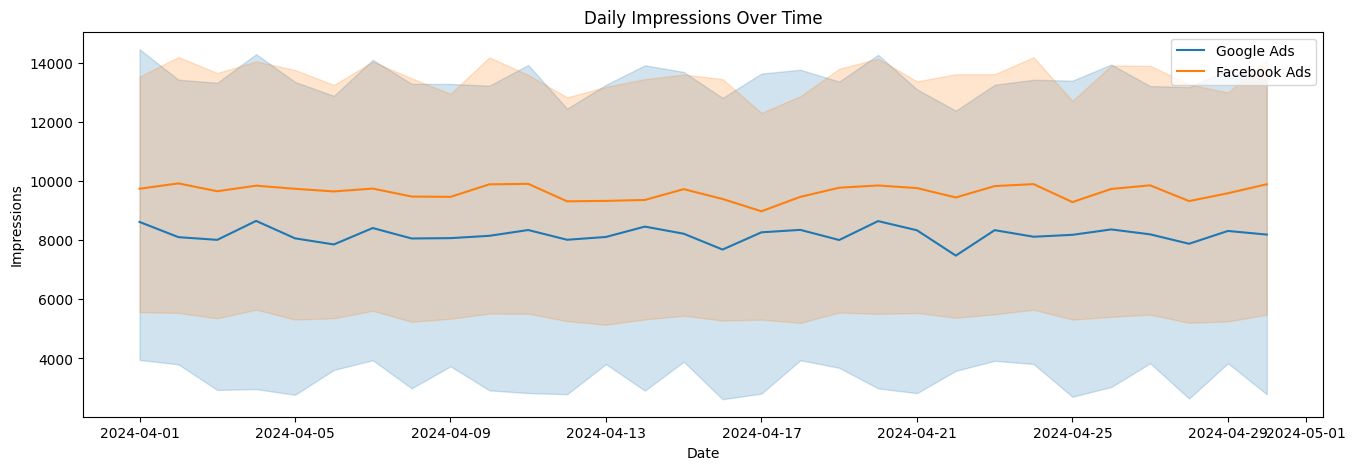

In [ ]:
plt.figure(figsize=(16, 5))
plt.title('Daily Impressions Over Time')
sns.lineplot(data=summary, x='Date', y='Impressions_google', label='Google Ads')
sns.lineplot(data=summary, x='Date', y='Impressions_facebook', label='Facebook Ads')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.legend()
plt.show()

* Clicks over time

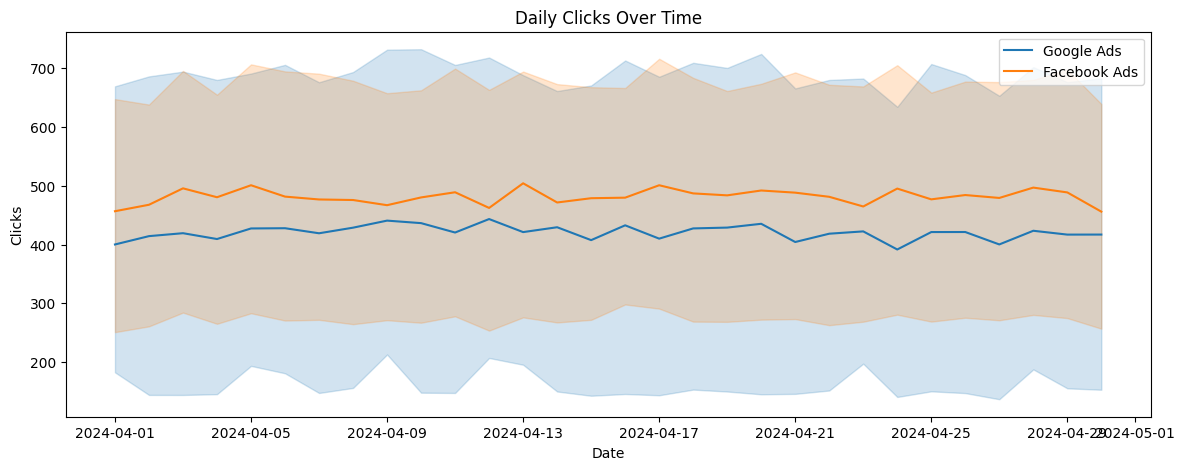

In [ ]:
plt.figure(figsize=(14, 5))
plt.title('Daily Clicks Over Time')
sns.lineplot(data=summary, x='Date', y='Clicks (Traffic)_google', label='Google Ads')
sns.lineplot(data=summary, x='Date', y='Clicks (Traffic)_facebook', label='Facebook Ads')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.legend()
plt.show()

* compare groupby with campaign names and AD set names

In [ ]:
summary = merged_data.groupby(['Campaign Name', 'Ad Set Name']).agg({
    'Impressions_google': 'sum',
    'Clicks (Traffic)_google': 'sum',
    'CTR_google': 'mean',
    'Cost (INR)_google': 'sum',
    'Leads_google': 'sum',
    'Traffic to Lead_google': 'mean',
    'Lead to Call_google': 'mean',
    'Call_google': 'sum',
    'Impressions_facebook': 'sum',
    'Clicks (Traffic)_facebook': 'sum',
    'CTR_facebook': 'mean',
    'Cost (INR)_facebook': 'sum',
    'Leads_facebook': 'sum',
    'Traffic to Lead_facebook': 'mean',
    'Lead to Call_facebook': 'mean',
    'Call_facebook': 'sum'
  }).reset_index()

* plot the barplot for comparing the impressions in google data over campaign and AD

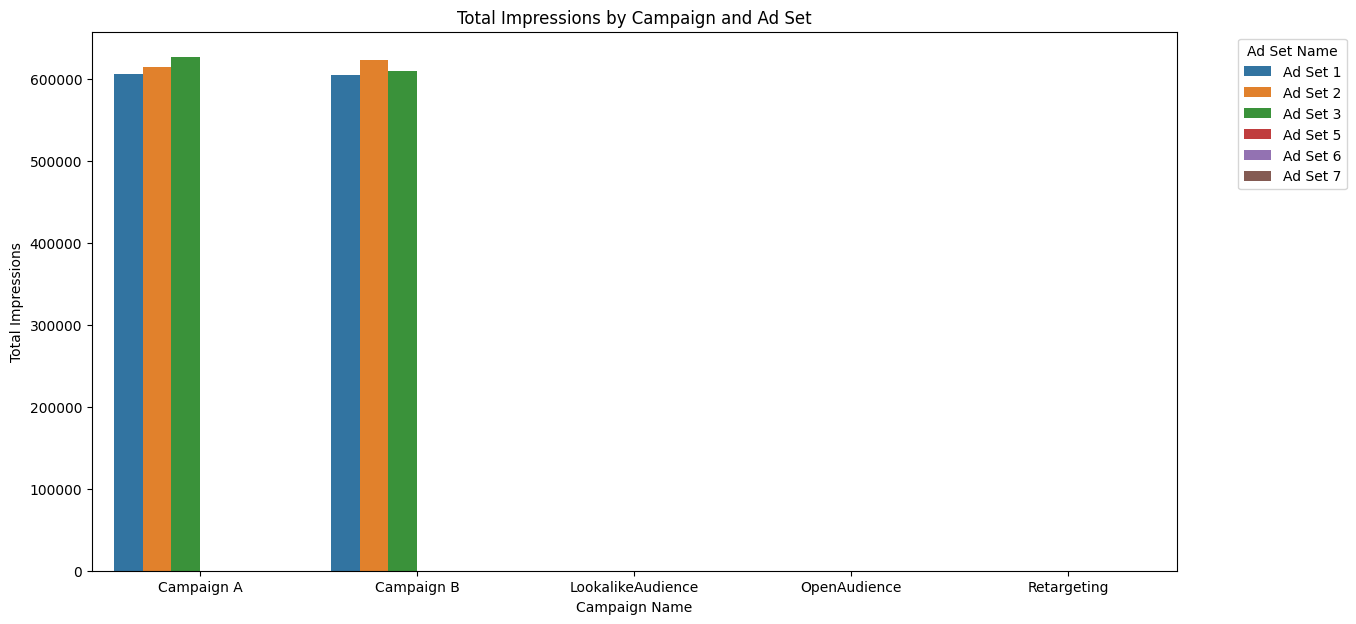

In [ ]:
plt.figure(figsize=(14, 7))
plt.title('Total Impressions by Campaign and Ad Set')
sns.barplot(data=summary, x='Campaign Name', y='Impressions_google', hue='Ad Set Name')
plt.xlabel('Campaign Name')
plt.ylabel('Total Impressions')
plt.legend(title='Ad Set Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* plot the barplot for comparing the impressions in facebook data over campaign and *AD*


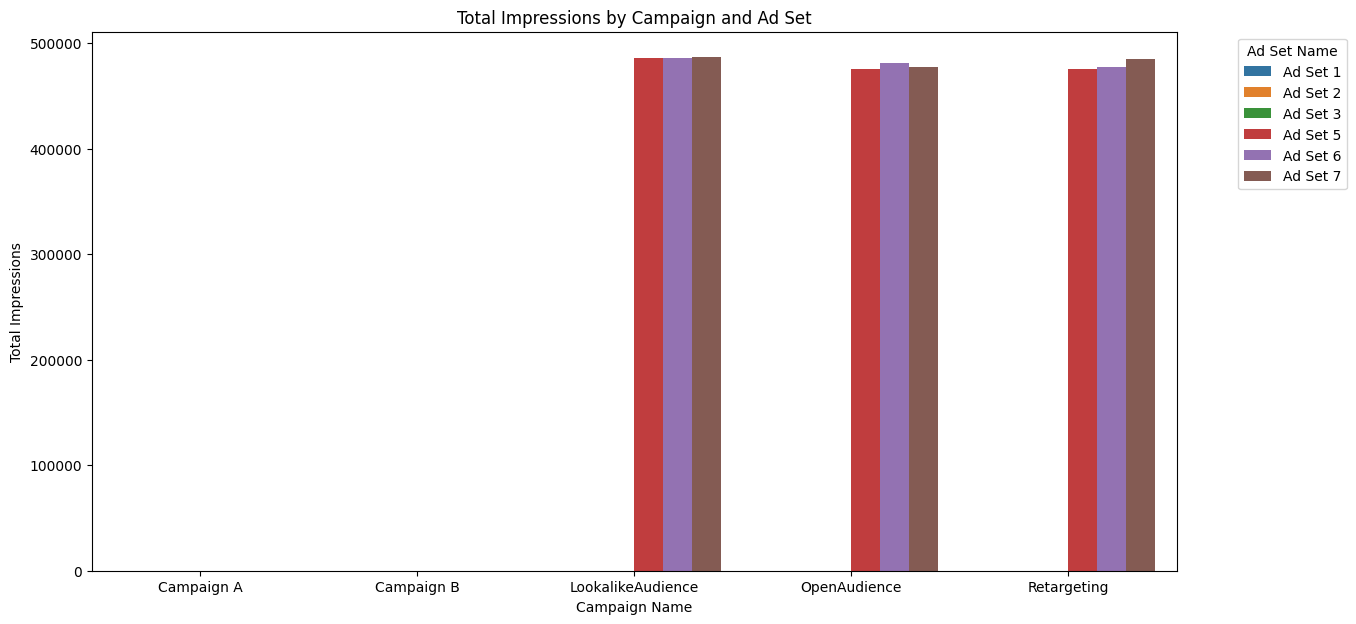

In [ ]:
plt.figure(figsize=(14, 7))
plt.title('Total Impressions by Campaign and Ad Set')
sns.barplot(data=summary, x='Campaign Name', y='Impressions_facebook', hue='Ad Set Name')
plt.xlabel('Campaign Name')
plt.ylabel('Total Impressions')
plt.legend(title='Ad Set Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* plot barplot to compare total number of clicks in google data with the campaign name and AD set

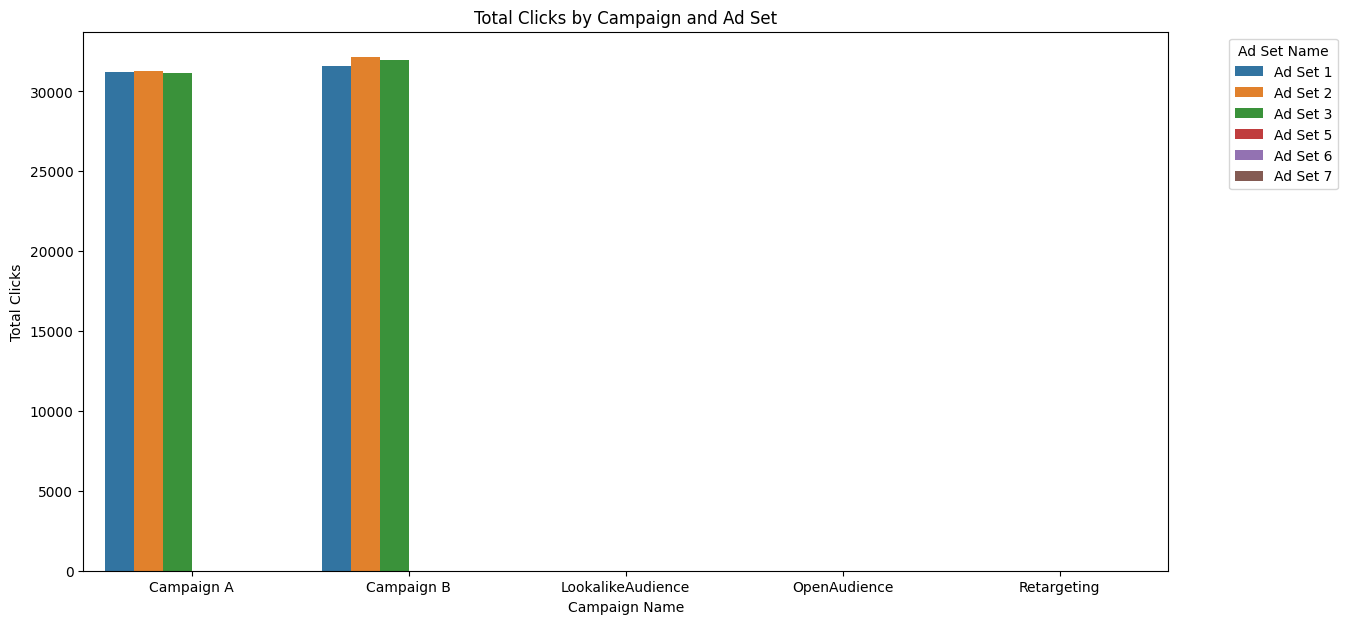

In [ ]:
plt.figure(figsize=(14, 7))
plt.title('Total Clicks by Campaign and Ad Set')
sns.barplot(data=summary, x='Campaign Name', y='Clicks (Traffic)_google', hue='Ad Set Name')
plt.xlabel('Campaign Name')
plt.ylabel('Total Clicks')
plt.legend(title='Ad Set Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* plot barplot to compare total number of clicks in facebook data with the campaign name and AD set

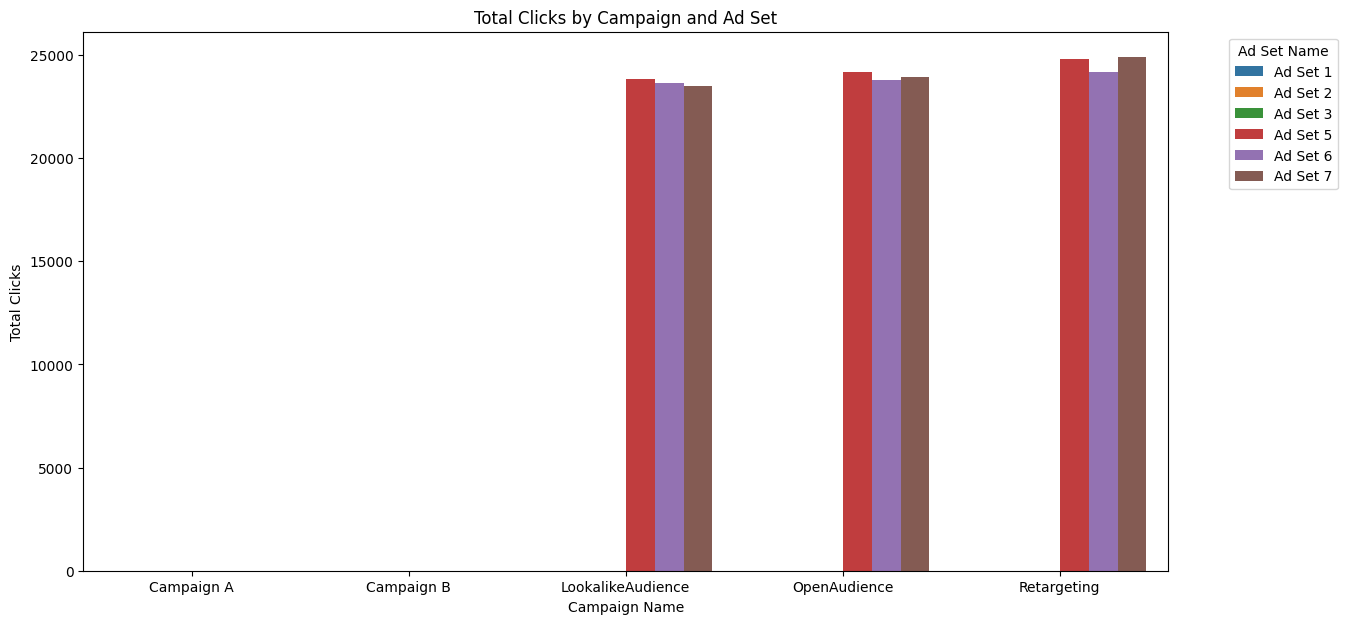

In [ ]:
plt.figure(figsize=(14, 7))
plt.title('Total Clicks by Campaign and Ad Set')
sns.barplot(data=summary, x='Campaign Name', y='Clicks (Traffic)_facebook', hue='Ad Set Name')
plt.xlabel('Campaign Name')
plt.ylabel('Total Clicks')
plt.legend(title='Ad Set Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* plot a barplot to compare cost per lead for google data over the campaign names

In [ ]:
summary.head()

,Campaign Name,Ad Set Name,Impressions_google,Clicks (Traffic)_google,CTR_google,Cost (INR)_google,Leads_google,Traffic to Lead_google,Lead to Call_google,Call_google,Impressions_facebook,Clicks (Traffic)_facebook,CTR_facebook,Cost (INR)_facebook,Leads_facebook,Traffic to Lead_facebook,Lead to Call_facebook,Call_facebook
0,Campaign A,Ad Set 1,604974.0,31208.0,0.051869,64659.48,1770.0,0.057148,0.516581,909.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0
1,Campaign A,Ad Set 2,613957.0,31262.0,0.051062,63755.39,1785.0,0.057457,0.474390,844.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0
2,Campaign A,Ad Set 3,625744.0,31184.0,0.050068,63291.58,1756.0,0.056660,0.517074,900.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0
3,Campaign B,Ad Set 1,604458.0,31585.0,0.052493,64314.65,1799.0,0.057545,0.470816,838.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0
4,Campaign B,Ad Set 2,622244.0,32130.0,0.051928,65108.43,1776.0,0.055712,0.519512,911.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0


**Task 3**

**Benchmark Comparison**

* converting the aggregate values to percentage

In [ ]:
summary['CTR_google']=summary['CTR_google']*100
summary['Lead to Call_google']=summary['Lead to Call_google']*100
summary['Traffic to Lead_google']=summary['Traffic to Lead_google']*100

In [ ]:
summary['CTR_facebook']=summary['CTR_facebook']*100
summary['Lead to Call_facebook']=summary['Lead to Call_facebook']*100
summary['Traffic to Lead_facebook']=summary['Traffic to Lead_facebook']*100

In [ ]:
benchmarks = {
    'CTR_google': 9,
    'CTR_facebook': 2.5,
    'Traffic to Lead_google': 7.5,
    'Traffic to Lead_facebook': 13.5,
    'Lead to Call_google': 27.5,
    'Lead to Call_facebook': 13.5
}


In [ ]:
summary['CTR_google_benchmark'] = benchmarks['CTR_google']
summary['CTR_facebook_benchmark'] = benchmarks['CTR_facebook']
summary['Traffic to Lead_google_benchmark'] = benchmarks['Traffic to Lead_google']
summary['Traffic to Lead_facebook_benchmark'] = benchmarks['Traffic to Lead_facebook']
summary['Lead to Call_google_benchmark'] = benchmarks['Lead to Call_google']
summary['Lead to Call_facebook_benchmark'] = benchmarks['Lead to Call_facebook']

In [ ]:
summary.head()

,Campaign Name,Ad Set Name,Impressions_google,Clicks (Traffic)_google,CTR_google,Cost (INR)_google,Leads_google,Traffic to Lead_google,Lead to Call_google,Call_google,...,Leads_facebook,Traffic to Lead_facebook,Lead to Call_facebook,Call_facebook,CTR_google_benchmark,CTR_facebook_benchmark,Traffic to Lead_google_benchmark,Traffic to Lead_facebook_benchmark,Lead to Call_google_benchmark,Lead to Call_facebook_benchmark
0,Campaign A,Ad Set 1,604974.0,31208.0,5.186876,64659.48,1770.0,5.714822,51.658057,909.0,...,0.0,NaN,NaN,0.0,9,2.5,7.5,13.5,27.5,13.5
1,Campaign A,Ad Set 2,613957.0,31262.0,5.106211,63755.39,1785.0,5.745683,47.438991,844.0,...,0.0,NaN,NaN,0.0,9,2.5,7.5,13.5,27.5,13.5
2,Campaign A,Ad Set 3,625744.0,31184.0,5.006822,63291.58,1756.0,5.665955,51.707400,900.0,...,0.0,NaN,NaN,0.0,9,2.5,7.5,13.5,27.5,13.5
3,Campaign B,Ad Set 1,604458.0,31585.0,5.249343,64314.65,1799.0,5.754470,47.081622,838.0,...,0.0,NaN,NaN,0.0,9,2.5,7.5,13.5,27.5,13.5
4,Campaign B,Ad Set 2,622244.0,32130.0,5.192834,65108.43,1776.0,5.571164,51.951187,911.0,...,0.0,NaN,NaN,0.0,9,2.5,7.5,13.5,27.5,13.5


In [ ]:
def plot_comparison(metric, channel):
    plt.figure(figsize=(14, 5))
    plt.title(f'{metric} Comparison for {channel.capitalize()} Ads')
    sns.barplot(data=summary, x='Campaign Name', y=f'{metric}_{channel}', hue='Ad Set Name')
    plt.axhline(y=benchmarks[f'{metric}_{channel}'], color='r', linestyle='--', label='Benchmark')
    plt.xlabel('Campaign Name')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.legend(title='Ad Set Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [ ]:
summary.columns

Index(['Campaign Name', 'Ad Set Name', 'Impressions_google',
       'Clicks (Traffic)_google', 'CTR_google', 'Cost (INR)_google',
       'Leads_google', 'Traffic to Lead_google', 'Lead to Call_google',
       'Call_google', 'Impressions_facebook', 'Clicks (Traffic)_facebook',
       'CTR_facebook', 'Cost (INR)_facebook', 'Leads_facebook',
       'Traffic to Lead_facebook', 'Lead to Call_facebook', 'Call_facebook',
       'CTR_google_benchmark', 'CTR_facebook_benchmark',
       'Traffic to Lead_google_benchmark',
       'Traffic to Lead_facebook_benchmark', 'Lead to Call_google_benchmark',
       'Lead to Call_facebook_benchmark'],
      dtype='object')

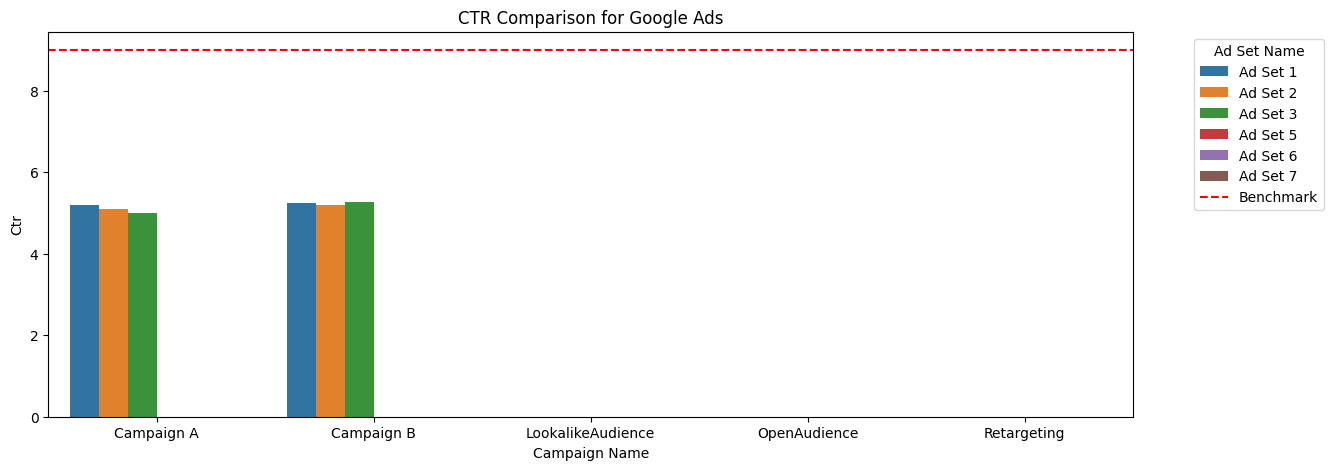

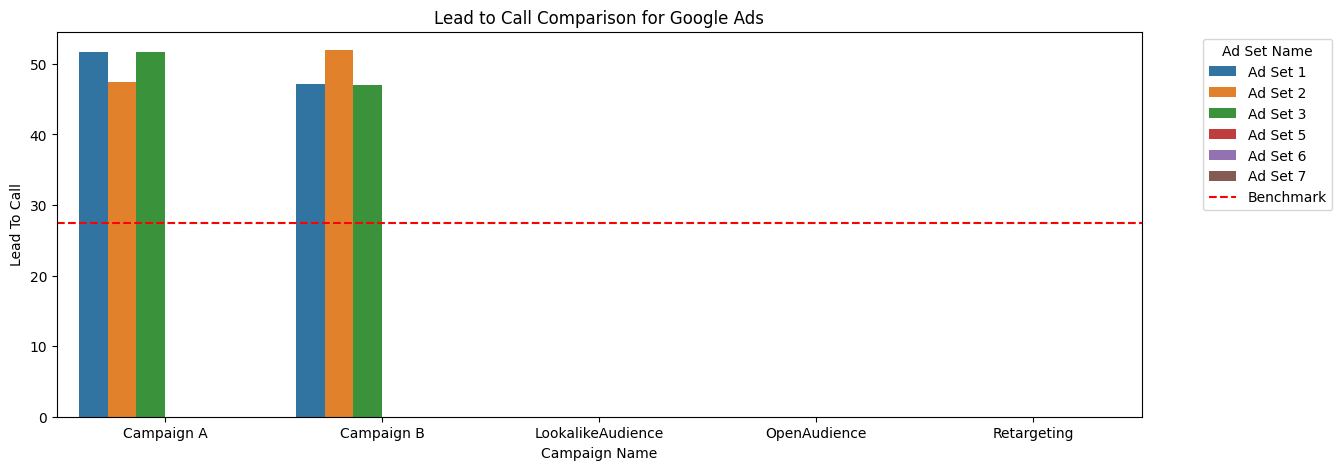

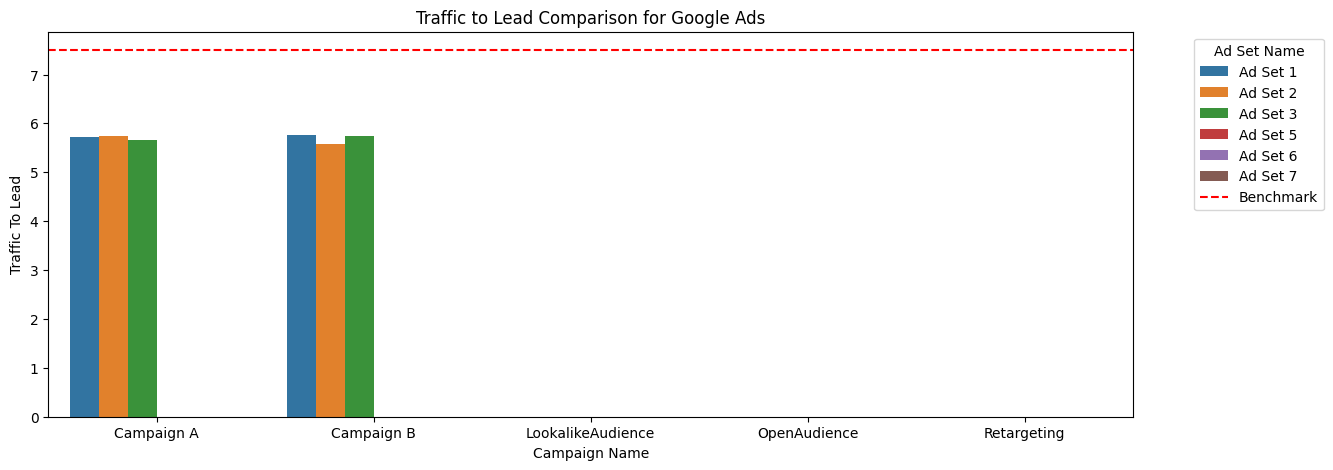

In [ ]:
# Google Ads comparison
plot_comparison('CTR', 'google')
plot_comparison('Lead to Call', 'google')
plot_comparison('Traffic to Lead', 'google')

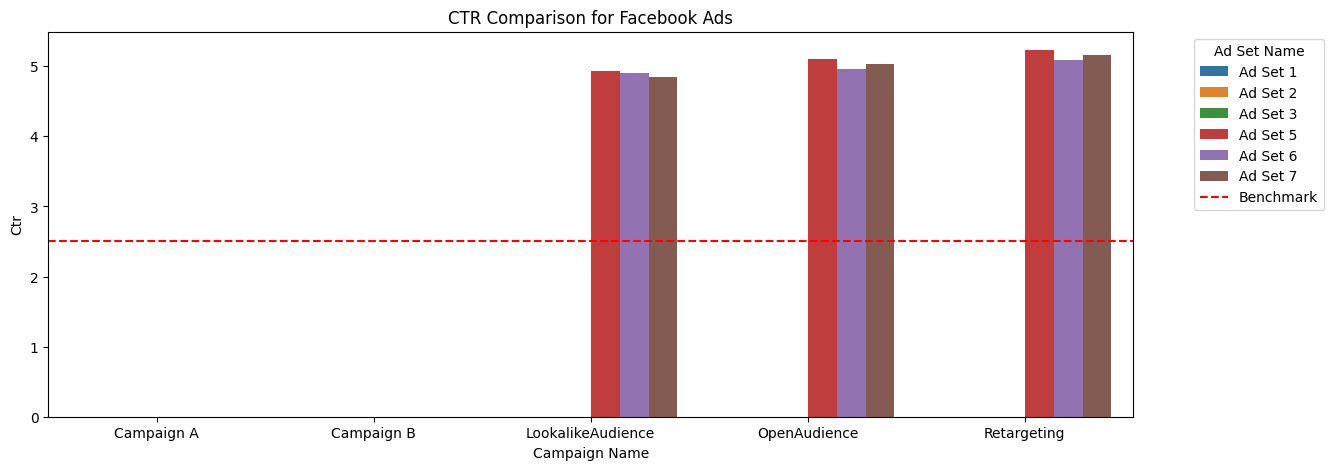

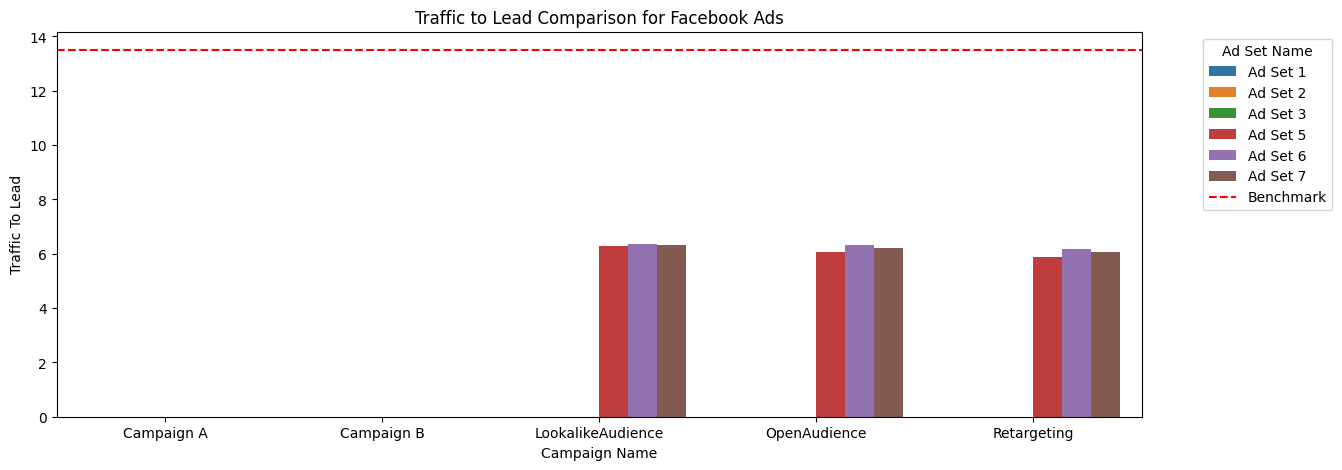

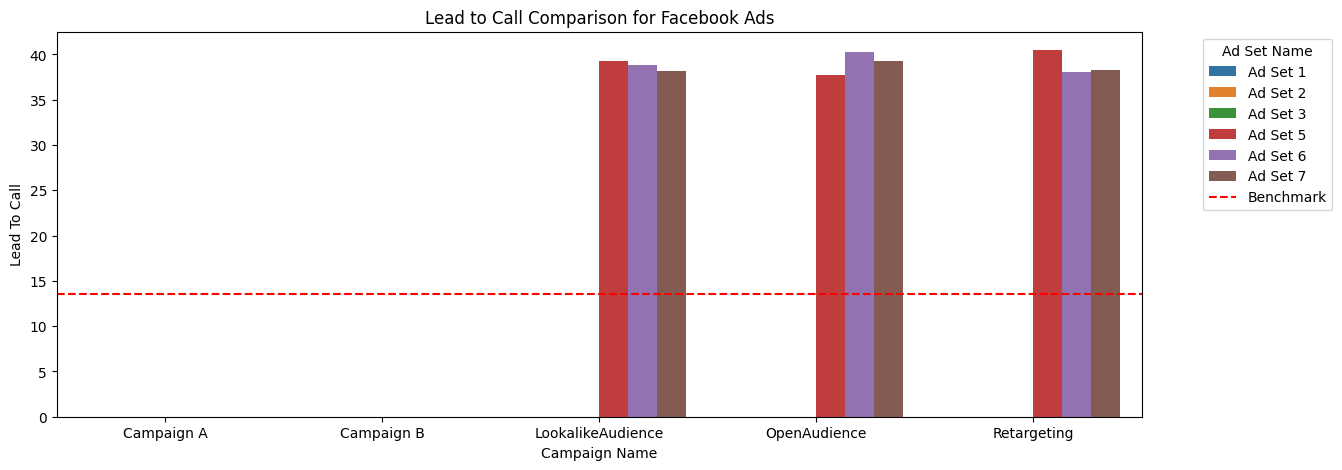

In [ ]:
plot_comparison('CTR', 'facebook')
plot_comparison('Traffic to Lead', 'facebook')
plot_comparison('Lead to Call', 'facebook')

* Identify areas where performance meets or exceeds benchmarks, and areas
where it falls short.


In [ ]:
def evaluate_performance(row, metric, channel):
    actual = row.get(f'{metric}_{channel}', None)
    benchmark = benchmarks.get(f'{metric}_{channel}', None)
    return 'Meets/Exceeds' if pd.notna(actual) and actual >= benchmark else 'Falls Short'

In [ ]:
for metric in ['CTR', 'Traffic to Lead', 'Lead to Call']:
    col_name = f'{metric}_google_evaluation'
    summary[col_name] = summary.apply(lambda row: evaluate_performance(row, metric, 'google'), axis=1)

In [ ]:
for metric in ['CTR', 'Traffic to Lead', 'Lead to Call']:
    col_name = f'{metric}_facebook_evaluation'
    summary[col_name] = summary.apply(lambda row: evaluate_performance(row, metric, 'facebook'), axis=1)

In [ ]:
google_performance = summary[['Campaign Name', 'Ad Set Name'] + [col for col in summary.columns if 'google' in col]]
facebook_performance = summary[['Campaign Name', 'Ad Set Name'] + [col for col in summary.columns if 'facebook' in col]]

In [ ]:
google_performance = google_performance.dropna(subset=[col for col in google_performance.columns if 'google' in col])
facebook_performance = facebook_performance.dropna(subset=[col for col in facebook_performance.columns if 'facebook' in col])

In [ ]:
print("Google Performance Evaluation:")
print(google_performance)


Google Performance Evaluation:
  Campaign Name Ad Set Name  Impressions_google  Clicks (Traffic)_google  \
0    Campaign A    Ad Set 1            604974.0                  31208.0   
1    Campaign A    Ad Set 2            613957.0                  31262.0   
2    Campaign A    Ad Set 3            625744.0                  31184.0   
3    Campaign B    Ad Set 1            604458.0                  31585.0   
4    Campaign B    Ad Set 2            622244.0                  32130.0   
5    Campaign B    Ad Set 3            609288.0                  31947.0   

   CTR_google  Cost (INR)_google  Leads_google  Traffic to Lead_google  \
0    5.186876           64659.48        1770.0                5.714822   
1    5.106211           63755.39        1785.0                5.745683   
2    5.006822           63291.58        1756.0                5.665955   
3    5.249343           64314.65        1799.0                5.754470   
4    5.192834           65108.43        1776.0                5.57

In [ ]:
print("Facebook Performance Evaluation:")
print(facebook_performance)

Facebook Performance Evaluation:
        Campaign Name Ad Set Name  Impressions_facebook  \
6   LookalikeAudience    Ad Set 5              485802.0   
7   LookalikeAudience    Ad Set 6              485649.0   
8   LookalikeAudience    Ad Set 7              486623.0   
9        OpenAudience    Ad Set 5              476008.0   
10       OpenAudience    Ad Set 6              481457.0   
11       OpenAudience    Ad Set 7              477304.0   
12        Retargeting    Ad Set 5              475659.0   
13        Retargeting    Ad Set 6              477304.0   
14        Retargeting    Ad Set 7              484745.0   

    Clicks (Traffic)_facebook  CTR_facebook  Cost (INR)_facebook  \
6                     23842.0      4.930921             51883.12   
7                     23628.0      4.895464             51726.46   
8                     23498.0      4.848743             52663.04   
9                     24155.0      5.103497             52545.06   
10                    23798.0      4

In [ ]:
REVENUE_PER_CALL_OFFLINE = 2000
REVENUE_PER_CALL_ONLINE = 1200
MAX_OFFLINE_CONSULTATIONS = 100

In [ ]:
summary['Revenue_Offline_google'] = summary['Call_google'].apply(lambda x: min(x, MAX_OFFLINE_CONSULTATIONS)) * REVENUE_PER_CALL_OFFLINE
summary['Revenue_Online_google'] = summary['Call_google'] * REVENUE_PER_CALL_ONLINE

summary['Total_Revenue_google'] = summary['Revenue_Offline_google'] + summary['Revenue_Online_google']

In [ ]:
summary['Revenue_Offline_facebook'] = summary['Call_facebook'].apply(lambda x: min(x, MAX_OFFLINE_CONSULTATIONS)) * REVENUE_PER_CALL_OFFLINE
summary['Revenue_Online_facebook'] = summary['Call_facebook'] * REVENUE_PER_CALL_ONLINE

summary['Total_Revenue_facebook'] = summary['Revenue_Offline_facebook'] + summary['Revenue_Online_facebook']

In [ ]:
metrics = ['CTR', 'Traffic to Lead', 'Lead to Call']
channels = ['google', 'facebook']
evaluation_columns = [f'{metric}_{channel}_evaluation' for metric in metrics for channel in channels]
print(summary[['Campaign Name', 'Ad Set Name'] + evaluation_columns + ['Total_Revenue_google', 'Total_Revenue_facebook']])

        Campaign Name Ad Set Name CTR_google_evaluation  \
0          Campaign A    Ad Set 1           Falls Short   
1          Campaign A    Ad Set 2           Falls Short   
2          Campaign A    Ad Set 3           Falls Short   
3          Campaign B    Ad Set 1           Falls Short   
4          Campaign B    Ad Set 2           Falls Short   
5          Campaign B    Ad Set 3           Falls Short   
6   LookalikeAudience    Ad Set 5           Falls Short   
7   LookalikeAudience    Ad Set 6           Falls Short   
8   LookalikeAudience    Ad Set 7           Falls Short   
9        OpenAudience    Ad Set 5           Falls Short   
10       OpenAudience    Ad Set 6           Falls Short   
11       OpenAudience    Ad Set 7           Falls Short   
12        Retargeting    Ad Set 5           Falls Short   
13        Retargeting    Ad Set 6           Falls Short   
14        Retargeting    Ad Set 7           Falls Short   

   CTR_facebook_evaluation Traffic to Lead_google_evalu

**Insight Generation**

* Opportunities for scaling

In [ ]:
# Filter rows where any evaluation for Google or Facebook is 'Meets/Exceeds'
scaling_opportunities_google = google_performance[(google_performance[[col for col in google_performance.columns if 'evaluation' in col]].apply(lambda x: any(x == 'Meets/Exceeds'), axis=1))]
scaling_opportunities_facebook = facebook_performance[(facebook_performance[[col for col in facebook_performance.columns if 'evaluation' in col]].apply(lambda x: any(x == 'Meets/Exceeds'), axis=1))]

# Concatenate the scaling opportunities for Google and Facebook
scaling_opportunities = pd.concat([scaling_opportunities_google, scaling_opportunities_facebook])

# Extract only the columns where performance meets or exceeds benchmarks
meets_exceeds_columns = scaling_opportunities.filter(regex='_evaluation').apply(lambda x: x.str.contains('Meets/Exceeds'))

# Display only the meets/exceeds columns
print("Columns where Performance Meets/Exceeds Benchmarks:")
print(meets_exceeds_columns)


Columns where Performance Meets/Exceeds Benchmarks:
   CTR_google_evaluation Traffic to Lead_google_evaluation  \
0                  False                             False   
1                  False                             False   
2                  False                             False   
3                  False                             False   
4                  False                             False   
5                  False                             False   
6                    NaN                               NaN   
7                    NaN                               NaN   
8                    NaN                               NaN   
9                    NaN                               NaN   
10                   NaN                               NaN   
11                   NaN                               NaN   
12                   NaN                               NaN   
13                   NaN                               NaN   
14                

* Issues to solve

In [ ]:
# Filter columns where performance falls short of benchmarks
falls_short_columns = scaling_opportunities.filter(regex='_evaluation').apply(lambda x: x.str.contains('Falls Short'))


# Display only the falls short columns
print("Columns where Performance Falls Short of Benchmarks:")
print(falls_short_columns)


Columns where Performance Falls Short of Benchmarks:
   CTR_google_evaluation Traffic to Lead_google_evaluation  \
0                   True                              True   
1                   True                              True   
2                   True                              True   
3                   True                              True   
4                   True                              True   
5                   True                              True   
6                    NaN                               NaN   
7                    NaN                               NaN   
8                    NaN                               NaN   
9                    NaN                               NaN   
10                   NaN                               NaN   
11                   NaN                               NaN   
12                   NaN                               NaN   
13                   NaN                               NaN   
14               

* Strategies to rationalise

In [ ]:
summary.head()

,Campaign Name,Ad Set Name,Impressions_google,Clicks (Traffic)_google,CTR_google,Cost (INR)_google,Leads_google,Traffic to Lead_google,Lead to Call_google,Call_google,...,Lead to Call_google_evaluation,CTR_facebook_evaluation,Traffic to Lead_facebook_evaluation,Lead to Call_facebook_evaluation,Revenue_Offline_google,Revenue_Online_google,Total_Revenue_google,Revenue_Offline_facebook,Revenue_Online_facebook,Total_Revenue_facebook
0,Campaign A,Ad Set 1,604974.0,31208.0,5.186876,64659.48,1770.0,5.714822,51.658057,909.0,...,Meets/Exceeds,Falls Short,Falls Short,Falls Short,200000.0,1090800.0,1290800.0,0.0,0.0,0.0
1,Campaign A,Ad Set 2,613957.0,31262.0,5.106211,63755.39,1785.0,5.745683,47.438991,844.0,...,Meets/Exceeds,Falls Short,Falls Short,Falls Short,200000.0,1012800.0,1212800.0,0.0,0.0,0.0
2,Campaign A,Ad Set 3,625744.0,31184.0,5.006822,63291.58,1756.0,5.665955,51.707400,900.0,...,Meets/Exceeds,Falls Short,Falls Short,Falls Short,200000.0,1080000.0,1280000.0,0.0,0.0,0.0
3,Campaign B,Ad Set 1,604458.0,31585.0,5.249343,64314.65,1799.0,5.754470,47.081622,838.0,...,Meets/Exceeds,Falls Short,Falls Short,Falls Short,200000.0,1005600.0,1205600.0,0.0,0.0,0.0
4,Campaign B,Ad Set 2,622244.0,32130.0,5.192834,65108.43,1776.0,5.571164,51.951187,911.0,...,Meets/Exceeds,Falls Short,Falls Short,Falls Short,200000.0,1093200.0,1293200.0,0.0,0.0,0.0


In [ ]:
summary = merged_data.groupby(['Campaign Name', 'Ad Set Name','Date']).agg({
    'Impressions_google': 'sum',
    'Clicks (Traffic)_google': 'sum',
    'CTR_google': 'mean',
    'Cost (INR)_google': 'sum',
    'Leads_google': 'sum',
    'CPL (INR)_google': 'mean',
    'Impressions_facebook': 'sum',
    'Clicks (Traffic)_facebook': 'sum',
    'CTR_facebook': 'mean',
    'Cost (INR)_facebook': 'sum',
    'Leads_facebook': 'sum',
    'CPL (INR)_facebook': 'mean'
}).reset_index()


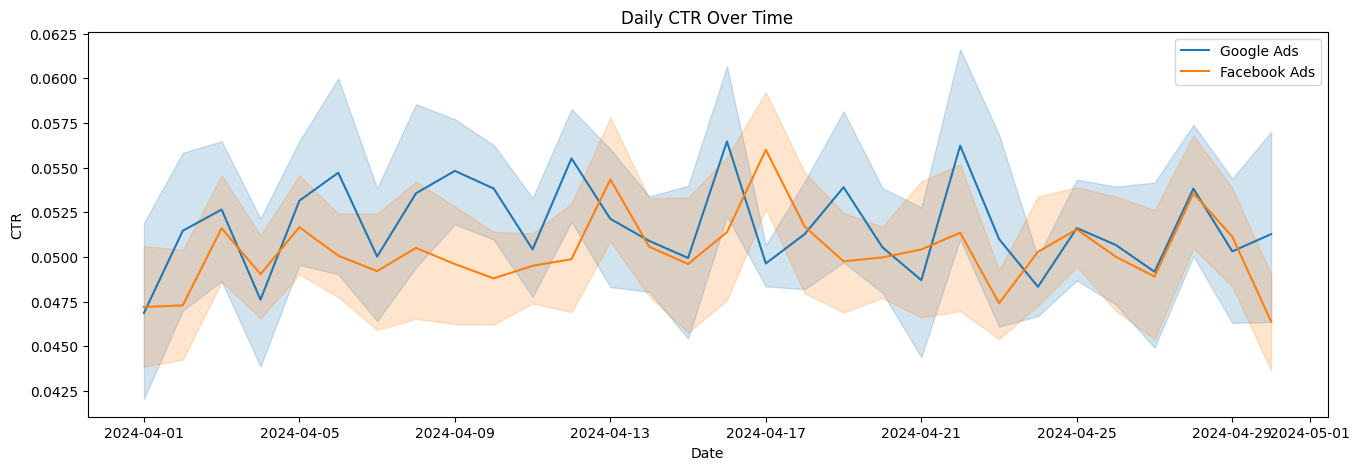

In [ ]:
plt.figure(figsize=(16, 5))
plt.title('Daily CTR Over Time')
sns.lineplot(data=summary, x='Date', y='CTR_google', label='Google Ads')
sns.lineplot(data=summary, x='Date', y='CTR_facebook', label='Facebook Ads')
plt.xlabel('Date')
plt.ylabel('CTR')
plt.legend()
plt.show()

ValueError: Could not interpret value `Traffic to Lead_google` for `y`. An entry with this name does not appear in `data`.

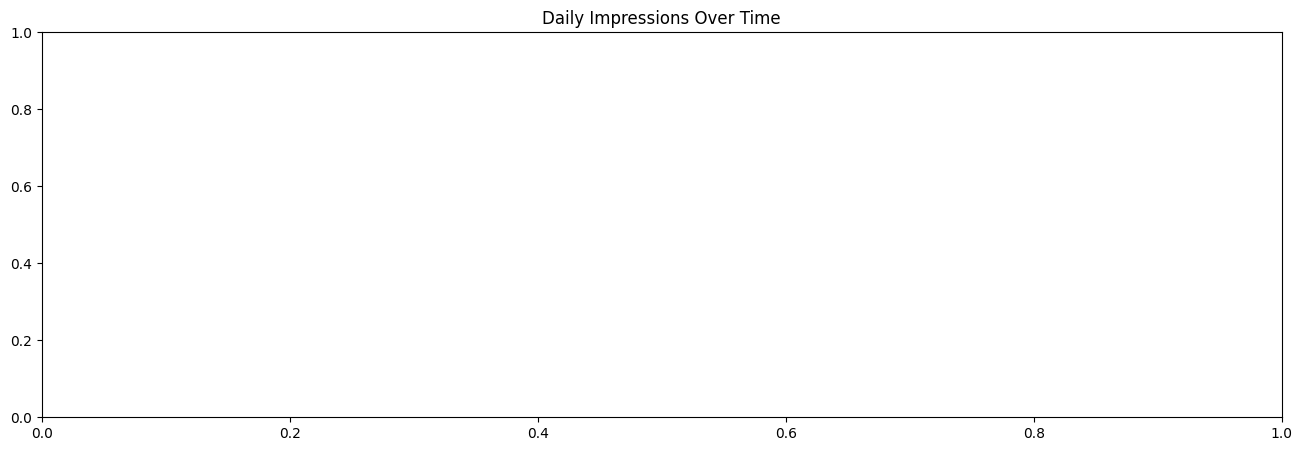

In [ ]:
plt.figure(figsize=(16, 5))
plt.title('Daily Impressions Over Time')
sns.lineplot(data=summary, x='Date', y='Traffic to Lead_google', label='Google Ads')
sns.lineplot(data=summary, x='Date', y='Traffic to Lead_facebook', label='Facebook Ads')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.legend()
plt.show()

In [ ]:
metrics = ['CTR_google', 'Traffic to Lead_google', 'Lead to Call_google','CTR_facebook', 'Traffic to Lead_facebook', 'Lead to Call_facebook']
stats = merged_data.groupby(['Campaign Name', 'Ad Set Name'])[metrics].agg(['mean', 'std'])
stats.columns = ['_'.join(col) for col in stats.columns]

# Calculate Coefficient of Variation (CV)
for metric in metrics:
    stats[f'cv_{metric}'] = stats[f'{metric}_std'] / stats[f'{metric}_mean']

# Display the results
stats.reset_index(inplace=True)
stats

,Campaign Name,Ad Set Name,CTR_google_mean,CTR_google_std,Traffic to Lead_google_mean,Traffic to Lead_google_std,Lead to Call_google_mean,Lead to Call_google_std,CTR_facebook_mean,CTR_facebook_std,Traffic to Lead_facebook_mean,Traffic to Lead_facebook_std,Lead to Call_facebook_mean,Lead to Call_facebook_std,cv_CTR_google,cv_Traffic to Lead_google,cv_Lead to Call_google,cv_CTR_facebook,cv_Traffic to Lead_facebook,cv_Lead to Call_facebook
0,Campaign A,Ad Set 1,0.051869,0.005486,0.057148,0.008508,0.516581,0.093081,NaN,NaN,NaN,NaN,NaN,NaN,0.105763,0.148878,0.180186,NaN,NaN,NaN
1,Campaign A,Ad Set 2,0.051062,0.004948,0.057457,0.006841,0.474390,0.081492,NaN,NaN,NaN,NaN,NaN,NaN,0.096902,0.119067,0.171783,NaN,NaN,NaN
2,Campaign A,Ad Set 3,0.050068,0.005503,0.056660,0.007121,0.517074,0.100676,NaN,NaN,NaN,NaN,NaN,NaN,0.109919,0.125686,0.194703,NaN,NaN,NaN
3,Campaign B,Ad Set 1,0.052493,0.005794,0.057545,0.008924,0.470816,0.117439,NaN,NaN,NaN,NaN,NaN,NaN,0.110367,0.155078,0.249437,NaN,NaN,NaN
4,Campaign B,Ad Set 2,0.051928,0.005641,0.055712,0.008479,0.519512,0.116513,NaN,NaN,NaN,NaN,NaN,NaN,0.108632,0.152200,0.224274,NaN,NaN,NaN
5,Campaign B,Ad Set 3,0.052670,0.005956,0.057412,0.007402,0.469650,0.107198,NaN,NaN,NaN,NaN,NaN,NaN,0.113085,0.128930,0.228250,NaN,NaN,NaN
6,LookalikeAudience,Ad Set 5,NaN,NaN,NaN,NaN,NaN,NaN,0.049309,0.005382,0.062853,0.006301,0.392759,0.065198,NaN,NaN,NaN,0.109144,0.100244,0.165999
7,LookalikeAudience,Ad Set 6,NaN,NaN,NaN,NaN,NaN,NaN,0.048955,0.005936,0.063704,0.006833,0.388579,0.067423,NaN,NaN,NaN,0.121256,0.107264,0.173511
8,LookalikeAudience,Ad Set 7,NaN,NaN,NaN,NaN,NaN,NaN,0.048487,0.004473,0.063403,0.006247,0.381991,0.057259,NaN,NaN,NaN,0.092243,0.098531,0.149896
9,OpenAudience,Ad Set 5,NaN,NaN,NaN,NaN,NaN,NaN,0.051035,0.005624,0.060741,0.006024,0.377265,0.060754,NaN,NaN,NaN,0.110190,0.099176,0.161037


In [ ]:
stats['cv_CTR_google']

0     0.105763
1     0.096902
2     0.109919
3     0.110367
4     0.108632
5     0.113085
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
Name: cv_CTR_google, dtype: float64

In [ ]:
stats['cv_Traffic to Lead_facebook']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6     0.100244
7     0.107264
8     0.098531
9     0.099176
10    0.093827
11    0.069665
12    0.099134
13    0.093677
14    0.105525
Name: cv_Traffic to Lead_facebook, dtype: float64

ValueError: Could not interpret value `Lead to Call_google` for `y`. An entry with this name does not appear in `data`.

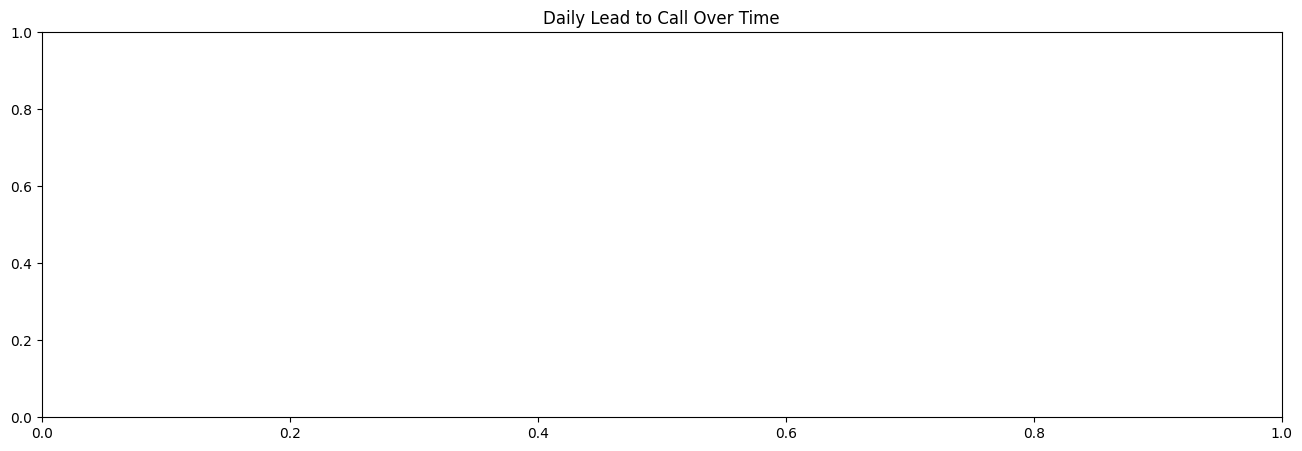

In [ ]:
plt.figure(figsize=(16, 5))
plt.title('Daily Lead to Call Over Time')
sns.lineplot(data=summary, x='Date', y='Lead to Call_google', label='Google Ads')
sns.lineplot(data=summary, x='Date', y='Lead to Call_facebook', label='Facebook Ads')
plt.xlabel('Lead to Call')
plt.ylabel('Impressions')
plt.legend()
plt.show()

**Recommendations**

* Bonus Step 2

In [ ]:

merged_data['Day_of_Week'] = merged_data['Date'].dt.day_name()


In [ ]:
numeric_columns = ['CTR_google', 'Traffic to Lead_google', 'Lead to Call_google',
                   'CTR_facebook', 'Traffic to Lead_facebook', 'Lead to Call_facebook']

In [ ]:
for col in numeric_columns:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Group by day of the week and calculate average metrics, skipping NaN values
daywise_summary = merged_data.groupby('Day_of_Week')[numeric_columns].mean().reset_index()

In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daywise_summary['Day_of_Week'] = pd.Categorical(daywise_summary['Day_of_Week'], categories=days_order, ordered=True)
daywise_summary = daywise_summary.sort_values('Day_of_Week')

# Display day-wise summary
print(daywise_summary)


In [ ]:
merged_data['DayOfWeek'] = merged_data['Date'].dt.day_name()

# Aggregate metrics by day of the week
daywise_summary = merged_data.groupby('DayOfWeek').agg({
    'CTR_google': 'mean',
    'CTR_facebook': 'mean',
    'Traffic to Lead_google': 'mean',
    'Traffic to Lead_facebook': 'mean',
    'Lead to Call_google': 'mean',
    'Lead to Call_facebook': 'mean'
}).reset_index()

# Sort days of the week correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daywise_summary['DayOfWeek'] = pd.Categorical(daywise_summary['DayOfWeek'], categories=day_order, ordered=True)
daywise_summary = daywise_summary.sort_values('DayOfWeek')

# Function to create bar plots
def plot_metric(metric):
    plt.figure(figsize=(10, 4))
    sns.barplot(x='DayOfWeek', y=metric, data=daywise_summary)
    plt.title(f'Average {metric} by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()

# Plot each metric
metrics = [
    'CTR_google', 'CTR_facebook',
    'Traffic to Lead_google', 'Traffic to Lead_facebook',
    'Lead to Call_google', 'Lead to Call_facebook'
]

for metric in metrics:
    plot_metric(metric)